# Usage example on model of _Corynebacterium tuberculostearicum (high GC Gram+)_.
In this notebook we show how to use the Mass Charge Curation python package. As an example model we use a model of [_Corynebacterium tuberculostearicum (high GC Gram+)_, strain DSM 44922](https://www.ncbi.nlm.nih.gov/assembly/GCF_013408445.1/) created with [CarveMe Version 1.5.1](https://carveme.readthedocs.io/en/latest/index.html), which here is simply called _model.xml_.

If you are interested in a more verbose output you can uncomment the following line:

In [1]:
import logging; logging.basicConfig(format='%(levelname)s: %(filename)s %(lineno)d, %(funcName)s: %(message)s', level=logging.INFO) 

Next we see if the Mass Charge Curation package is installed properly.

In [3]:
try: import MCC
except Exception as e: print("The mass charge curation package does not seem to be installed correctly. Make sure you have the correct python version installed and try running pip install -e ./.. in the folder of this notebook."); raise e

## Setting input path
We can use the package with different type of models. Depending on what else we intend to do with the model we can already read it in using libsbml or cobraPy or immediatly pass in the path of the model (This will cause the module to read it in itself using libsbml).

In [4]:
model = "model.xml"

# Alternatives:
# reading in the model beforehand using libsbml:
'''
import libsbml
reader = libsbml.SBMLReader()
document = reader.readSBML(model)
model = document.getModel()
'''
# reading in the model beforehand using cobraPy:
'''
import cobra
model = cobra.io.read_sbml_model(model)
'''
print(model)

model.xml


## Basic Model Information
First we can take a quick look at the model using the module ModelInterface class:

In [5]:
mi = MCC.ModelInterface(model)
print(f"The model has {len(mi.metabolites)} metabolites and {len(mi.reactions)} reactions.")
unbalanced_reactions = [r_id for r_id, r in mi.reactions.items() if (not r.is_balanced())]
print(f"There are {len(unbalanced_reactions)} unbalanced reactions with {len(mi.get_pseudo_reactions())} pseudo reactions.")

The model has 1019 metabolites and 1481 reactions.
There are 446 unbalanced reactions with 196 pseudo reactions.


## Curating Mass and Charge
We can now instantiate a curation class. There are different ways to use the package, depending how data should be gathered, how much curation has already been done and how much data is available offline.

We will first give an example of the most simple usage, downloading as many databases as possible and updating all [identifiers.org](https://identifiers.org/) identifiers we need for the package to work optimally. This will take significantly longer (**~ 15 Minutes**) than running the algorithm on an already annotated model, however it is important to use the most up-to-date identifiers if we want to include as much information as possible.

This will create a folder _data_ in the current directory where all database information is downloaded to.

The arguments are as follows:
* **model**: Model we want to curate.
* **data_path**: Path to the directory containing database files. Defaults to _/data_. If the directory does not exist, it will be created. If a file cannot be found, we will try to download it. 
* **update_ids**: If this is set to _True_, we will first try to update all [identifiers.org](https://identifiers.org/) ids. This will take a while but is important to properly index the different databases. Defaults to _False_. 

**Note**: It is expected to see _No objective coefficients in model. Unclear what should be optimized_ warnings here, this poses no problem for this package.

In [6]:
balancer = MCC.MassChargeCuration(model = model, data_path = "./data", run_optimization = True, update_ids = True)

INFO: DataCollection.py 182, get_all_ids: 1/1019: M_10fthf_c
INFO: DataCollection.py 226, get_ids: Found new ids ['10fthf'] in bigg.metabolite via id & name based search for M_10fthf_c
INFO: DataCollection.py 182, get_all_ids: 2/1019: M_12dgr140_c
INFO: DataCollection.py 226, get_ids: Found new ids ['12dgr140'] in bigg.metabolite via id & name based search for M_12dgr140_c
INFO: DataCollection.py 182, get_all_ids: 3/1019: M_12dgr140_p
INFO: DataCollection.py 226, get_ids: Found new ids ['12dgr140'] in bigg.metabolite via id & name based search for M_12dgr140_p
INFO: DataCollection.py 182, get_all_ids: 4/1019: M_12dgr141_c
INFO: DataCollection.py 226, get_ids: Found new ids ['12dgr141'] in bigg.metabolite via id & name based search for M_12dgr141_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM4940 in metanetx.chemical from ('bigg.metabolite', '12dgr141') for M_12dgr141_c
INFO: DataCollection.py 182, get_all_ids: 5/1019: M_12dgr141_p
INFO: DataCollection.py 226, get_ids: Found 

INFO: DataCollection.py 182, get_all_ids: 27/1019: M_25aics_c
INFO: DataCollection.py 226, get_ids: Found new ids ['25aics'] in bigg.metabolite via id & name based search for M_25aics_c
INFO: DataCollection.py 182, get_all_ids: 28/1019: M_25dhpp_c
INFO: DataCollection.py 226, get_ids: Found new ids ['25dhpp'] in bigg.metabolite via id & name based search for M_25dhpp_c
INFO: DataCollection.py 182, get_all_ids: 29/1019: M_25drapp_c
INFO: DataCollection.py 226, get_ids: Found new ids ['25drapp'] in bigg.metabolite via id & name based search for M_25drapp_c
INFO: DataCollection.py 182, get_all_ids: 30/1019: M_26dap_LL_c
INFO: DataCollection.py 226, get_ids: Found new ids ['26dap_LL'] in bigg.metabolite via id & name based search for M_26dap_LL_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM644 in metanetx.chemical from ('bigg.metabolite', '26dap_LL') for M_26dap_LL_c
INFO: DataCollection.py 182, get_all_ids: 31/1019: M_26dap__M_c
INFO: DataCollection.py 226, get_ids: Found new i

INFO: DataCollection.py 275, get_ids: Found new id MNXM2178 in metanetx.chemical from ('bigg.metabolite', '2dmmq8') for M_2dmmq8_c
INFO: DataCollection.py 182, get_all_ids: 52/1019: M_2dmmql8_c
INFO: DataCollection.py 226, get_ids: Found new ids ['2dmmql8'] in bigg.metabolite via id & name based search for M_2dmmql8_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM558 in metanetx.chemical from ('bigg.metabolite', '2dmmql8') for M_2dmmql8_c
INFO: DataCollection.py 182, get_all_ids: 53/1019: M_2dr1p_c
INFO: DataCollection.py 226, get_ids: Found new ids ['2dr1p'] in bigg.metabolite via id & name based search for M_2dr1p_c
INFO: DataCollection.py 182, get_all_ids: 54/1019: M_2dr5p_c
INFO: DataCollection.py 226, get_ids: Found new ids ['2dr5p'] in bigg.metabolite via id & name based search for M_2dr5p_c
INFO: DataCollection.py 182, get_all_ids: 55/1019: M_2hadnt_c
INFO: DataCollection.py 226, get_ids: Found new ids ['2hadnt'] in bigg.metabolite via id & name based search for M_2hadn

INFO: DataCollection.py 275, get_ids: Found new id MNXM611 in metanetx.chemical from ('bigg.metabolite', '3dhsk') for M_3dhsk_c
INFO: DataCollection.py 182, get_all_ids: 77/1019: M_3hbcoa__R_c
INFO: DataCollection.py 226, get_ids: Found new ids ['3hbcoa__R'] in bigg.metabolite via id & name based search for M_3hbcoa__R_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM162788 in metanetx.chemical from ('bigg.metabolite', '3hbcoa__R') for M_3hbcoa__R_c
INFO: DataCollection.py 182, get_all_ids: 78/1019: M_3hbcoa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['3hbcoa'] in bigg.metabolite via id & name based search for M_3hbcoa_c
INFO: DataCollection.py 275, get_ids: Found new id 3hbcoa__R in bigg.metabolite from ('metanetx.chemical', 'MNXM162788') for M_3hbcoa_c
INFO: DataCollection.py 182, get_all_ids: 79/1019: M_3hpcoa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['3hpcoa'] in bigg.metabolite via id & name based search for M_3hpcoa_c
INFO: DataCollection.py 182, g

INFO: DataCollection.py 182, get_all_ids: 99/1019: M_4ampm_c
INFO: DataCollection.py 226, get_ids: Found new ids ['4ampm'] in bigg.metabolite via id & name based search for M_4ampm_c
INFO: DataCollection.py 182, get_all_ids: 100/1019: M_4c2me_c
INFO: DataCollection.py 226, get_ids: Found new ids ['4c2me'] in bigg.metabolite via id & name based search for M_4c2me_c
INFO: DataCollection.py 182, get_all_ids: 101/1019: M_4hadnt_c
INFO: DataCollection.py 226, get_ids: Found new ids ['4hadnt'] in bigg.metabolite via id & name based search for M_4hadnt_c
INFO: DataCollection.py 182, get_all_ids: 102/1019: M_4hba_c
INFO: DataCollection.py 226, get_ids: Found new ids ['4hba'] in bigg.metabolite via id & name based search for M_4hba_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM107505 in metanetx.chemical from ('bigg.metabolite', '4hba') for M_4hba_c
INFO: DataCollection.py 182, get_all_ids: 103/1019: M_4hba_e
INFO: DataCollection.py 226, get_ids: Found new ids ['4hba'] in bigg.metabo

INFO: DataCollection.py 275, get_ids: Found new id MNXM963 in metanetx.chemical from ('bigg.metabolite', '5dglcn') for M_5dglcn_p
INFO: DataCollection.py 182, get_all_ids: 122/1019: M_5drib_c
INFO: DataCollection.py 226, get_ids: Found new ids ['5drib'] in bigg.metabolite via id & name based search for M_5drib_c
INFO: DataCollection.py 182, get_all_ids: 123/1019: M_5drib_e
INFO: DataCollection.py 226, get_ids: Found new ids ['5drib'] in bigg.metabolite via id & name based search for M_5drib_e
INFO: DataCollection.py 182, get_all_ids: 124/1019: M_5fthf_c
INFO: DataCollection.py 226, get_ids: Found new ids ['5fthf'] in bigg.metabolite via id & name based search for M_5fthf_c
INFO: DataCollection.py 182, get_all_ids: 125/1019: M_5mcsn_c
INFO: DataCollection.py 226, get_ids: Found new ids ['5mcsn'] in bigg.metabolite via id & name based search for M_5mcsn_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM3509 in metanetx.chemical from ('bigg.metabolite', '5mcsn') for M_5mcsn_c
INFO:

INFO: DataCollection.py 182, get_all_ids: 153/1019: M_R_3hhpa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['R_3hhpa'] in bigg.metabolite via id & name based search for M_R_3hhpa_c
INFO: DataCollection.py 182, get_all_ids: 154/1019: M_R_3hhpcoa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['R_3hhpcoa'] in bigg.metabolite via id & name based search for M_R_3hhpcoa_c
INFO: DataCollection.py 182, get_all_ids: 155/1019: M_R_3hhxa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['R_3hhxa'] in bigg.metabolite via id & name based search for M_R_3hhxa_c
INFO: DataCollection.py 182, get_all_ids: 156/1019: M_R_3hhxa_e
INFO: DataCollection.py 226, get_ids: Found new ids ['R_3hhxa'] in bigg.metabolite via id & name based search for M_R_3hhxa_e
INFO: DataCollection.py 182, get_all_ids: 157/1019: M_R_3hhxa_p
INFO: DataCollection.py 226, get_ids: Found new ids ['R_3hhxa'] in bigg.metabolite via id & name based search for M_R_3hhxa_p
INFO: DataCollection.py 182, get_all_ids: 15

INFO: DataCollection.py 182, get_all_ids: 190/1019: M_ac_c
INFO: DataCollection.py 226, get_ids: Found new ids ['ac'] in bigg.metabolite via id & name based search for M_ac_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM26 in metanetx.chemical from ('bigg.metabolite', 'ac') for M_ac_c
INFO: DataCollection.py 182, get_all_ids: 191/1019: M_ac_e
INFO: DataCollection.py 226, get_ids: Found new ids ['ac'] in bigg.metabolite via id & name based search for M_ac_e
INFO: DataCollection.py 275, get_ids: Found new id MNXM26 in metanetx.chemical from ('bigg.metabolite', 'ac') for M_ac_e
INFO: DataCollection.py 182, get_all_ids: 192/1019: M_ac_p
INFO: DataCollection.py 226, get_ids: Found new ids ['ac'] in bigg.metabolite via id & name based search for M_ac_p
INFO: DataCollection.py 275, get_ids: Found new id MNXM26 in metanetx.chemical from ('bigg.metabolite', 'ac') for M_ac_p
INFO: DataCollection.py 182, get_all_ids: 193/1019: M_acald_c
INFO: DataCollection.py 226, get_ids: Found new id

INFO: DataCollection.py 275, get_ids: Found new id MNXM280 in metanetx.chemical from ('bigg.metabolite', 'actp') for M_actp_c
INFO: DataCollection.py 182, get_all_ids: 213/1019: M_acysbmn_c
INFO: DataCollection.py 182, get_all_ids: 214/1019: M_acysbmn_e
INFO: DataCollection.py 182, get_all_ids: 215/1019: M_ade_c
INFO: DataCollection.py 226, get_ids: Found new ids ['ade'] in bigg.metabolite via id & name based search for M_ade_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM168 in metanetx.chemical from ('bigg.metabolite', 'ade') for M_ade_c
INFO: DataCollection.py 182, get_all_ids: 216/1019: M_adhlam_c
INFO: DataCollection.py 226, get_ids: Found new ids ['adhlam', 'HC00682'] in bigg.metabolite via id & name based search for M_adhlam_c
INFO: DataCollection.py 182, get_all_ids: 217/1019: M_adn_c
INFO: DataCollection.py 226, get_ids: Found new ids ['adn'] in bigg.metabolite via id & name based search for M_adn_c
INFO: DataCollection.py 182, get_all_ids: 218/1019: M_adp_c
INFO: Da

INFO: DataCollection.py 182, get_all_ids: 249/1019: M_alahis_c
INFO: DataCollection.py 226, get_ids: Found new ids ['alahis'] in bigg.metabolite via id & name based search for M_alahis_c
INFO: DataCollection.py 182, get_all_ids: 250/1019: M_alahis_e
INFO: DataCollection.py 226, get_ids: Found new ids ['alahis'] in bigg.metabolite via id & name based search for M_alahis_e
INFO: DataCollection.py 182, get_all_ids: 251/1019: M_alahis_p
INFO: DataCollection.py 226, get_ids: Found new ids ['alahis'] in bigg.metabolite via id & name based search for M_alahis_p
INFO: DataCollection.py 182, get_all_ids: 252/1019: M_alaleu_c
INFO: DataCollection.py 226, get_ids: Found new ids ['alaleu'] in bigg.metabolite via id & name based search for M_alaleu_c
INFO: DataCollection.py 182, get_all_ids: 253/1019: M_alaleu_e
INFO: DataCollection.py 226, get_ids: Found new ids ['alaleu'] in bigg.metabolite via id & name based search for M_alaleu_e
INFO: DataCollection.py 182, get_all_ids: 254/1019: M_alaleu_p
IN

INFO: DataCollection.py 226, get_ids: Found new ids ['asn__L'] in bigg.metabolite via id & name based search for M_asn__L_c
INFO: DataCollection.py 182, get_all_ids: 280/1019: M_asn__L_e
INFO: DataCollection.py 226, get_ids: Found new ids ['asn__L'] in bigg.metabolite via id & name based search for M_asn__L_e
INFO: DataCollection.py 182, get_all_ids: 281/1019: M_asn__L_p
INFO: DataCollection.py 226, get_ids: Found new ids ['asn__L'] in bigg.metabolite via id & name based search for M_asn__L_p
INFO: DataCollection.py 182, get_all_ids: 282/1019: M_aso3_c
INFO: DataCollection.py 226, get_ids: Found new ids ['aso3'] in bigg.metabolite via id & name based search for M_aso3_c
INFO: DataCollection.py 182, get_all_ids: 283/1019: M_aso3_e
INFO: DataCollection.py 226, get_ids: Found new ids ['aso3'] in bigg.metabolite via id & name based search for M_aso3_e
INFO: DataCollection.py 182, get_all_ids: 284/1019: M_aso3_p
INFO: DataCollection.py 226, get_ids: Found new ids ['aso3'] in bigg.metabolite

INFO: DataCollection.py 275, get_ids: Found new id MNXM138 in metanetx.chemical from ('bigg.metabolite', 'cbp') for M_cbp_c
INFO: DataCollection.py 182, get_all_ids: 308/1019: M_cd2_c
INFO: DataCollection.py 226, get_ids: Found new ids ['cd2'] in bigg.metabolite via id & name based search for M_cd2_c
INFO: DataCollection.py 182, get_all_ids: 309/1019: M_cd2_e
INFO: DataCollection.py 226, get_ids: Found new ids ['cd2'] in bigg.metabolite via id & name based search for M_cd2_e
INFO: DataCollection.py 182, get_all_ids: 310/1019: M_cd2_p
INFO: DataCollection.py 226, get_ids: Found new ids ['cd2'] in bigg.metabolite via id & name based search for M_cd2_p
INFO: DataCollection.py 182, get_all_ids: 311/1019: M_cdp_c
INFO: DataCollection.py 226, get_ids: Found new ids ['cdp'] in bigg.metabolite via id & name based search for M_cdp_c
INFO: DataCollection.py 182, get_all_ids: 312/1019: M_cdpc16c19g_c
INFO: DataCollection.py 182, get_all_ids: 313/1019: M_cdpc19c19g_c
INFO: DataCollection.py 182, g

INFO: DataCollection.py 275, get_ids: Found new id MNXM13 in metanetx.chemical from ('bigg.metabolite', 'co2') for M_co2_e
INFO: DataCollection.py 182, get_all_ids: 340/1019: M_co2_p
INFO: DataCollection.py 226, get_ids: Found new ids ['co2_', 'co2'] in bigg.metabolite via id & name based search for M_co2_p
INFO: DataCollection.py 275, get_ids: Found new id MNXM13 in metanetx.chemical from ('bigg.metabolite', 'co2') for M_co2_p
INFO: DataCollection.py 182, get_all_ids: 341/1019: M_coa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['coa'] in bigg.metabolite via id & name based search for M_coa_c
INFO: DataCollection.py 182, get_all_ids: 342/1019: M_cobalt2_c
INFO: DataCollection.py 226, get_ids: Found new ids ['cobalt2'] in bigg.metabolite via id & name based search for M_cobalt2_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM90960 in metanetx.chemical from ('bigg.metabolite', 'cobalt2') for M_cobalt2_c
INFO: DataCollection.py 182, get_all_ids: 343/1019: M_cobalt2_e
IN

INFO: DataCollection.py 182, get_all_ids: 368/1019: M_db4p_c
INFO: DataCollection.py 226, get_ids: Found new ids ['db4p'] in bigg.metabolite via id & name based search for M_db4p_c
INFO: DataCollection.py 182, get_all_ids: 369/1019: M_dca_c
INFO: DataCollection.py 226, get_ids: Found new ids ['dca'] in bigg.metabolite via id & name based search for M_dca_c
INFO: DataCollection.py 182, get_all_ids: 370/1019: M_dca_e
INFO: DataCollection.py 226, get_ids: Found new ids ['dca'] in bigg.metabolite via id & name based search for M_dca_e
INFO: DataCollection.py 182, get_all_ids: 371/1019: M_dca_p
INFO: DataCollection.py 226, get_ids: Found new ids ['dca'] in bigg.metabolite via id & name based search for M_dca_p
INFO: DataCollection.py 182, get_all_ids: 372/1019: M_dcacoa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['dcacoa'] in bigg.metabolite via id & name based search for M_dcacoa_c
INFO: DataCollection.py 182, get_all_ids: 373/1019: M_dcamp_c
INFO: DataCollection.py 226, get_ids

INFO: DataCollection.py 182, get_all_ids: 397/1019: M_dhptd_c
INFO: DataCollection.py 226, get_ids: Found new ids ['dhptd'] in bigg.metabolite via id & name based search for M_dhptd_c
INFO: DataCollection.py 182, get_all_ids: 398/1019: M_dhptd_e
INFO: DataCollection.py 226, get_ids: Found new ids ['dhptd'] in bigg.metabolite via id & name based search for M_dhptd_e
INFO: DataCollection.py 182, get_all_ids: 399/1019: M_din_c
INFO: DataCollection.py 226, get_ids: Found new ids ['din'] in bigg.metabolite via id & name based search for M_din_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM935 in metanetx.chemical from ('bigg.metabolite', 'din') for M_din_c
INFO: DataCollection.py 182, get_all_ids: 400/1019: M_dmlz_c
INFO: DataCollection.py 226, get_ids: Found new ids ['dmlz'] in bigg.metabolite via id & name based search for M_dmlz_c
INFO: DataCollection.py 182, get_all_ids: 401/1019: M_dmpp_c
INFO: DataCollection.py 226, get_ids: Found new ids ['dmpp'] in bigg.metabolite via id &

INFO: DataCollection.py 182, get_all_ids: 422/1019: M_etoh_p
INFO: DataCollection.py 226, get_ids: Found new ids ['etoh'] in bigg.metabolite via id & name based search for M_etoh_p
INFO: DataCollection.py 182, get_all_ids: 423/1019: M_f1p_c
INFO: DataCollection.py 226, get_ids: Found new ids ['f1p'] in bigg.metabolite via id & name based search for M_f1p_c
INFO: DataCollection.py 182, get_all_ids: 424/1019: M_f6p_c
INFO: DataCollection.py 226, get_ids: Found new ids ['f6p'] in bigg.metabolite via id & name based search for M_f6p_c
INFO: DataCollection.py 182, get_all_ids: 425/1019: M_fad_c
INFO: DataCollection.py 226, get_ids: Found new ids ['fad'] in bigg.metabolite via id & name based search for M_fad_c
INFO: DataCollection.py 182, get_all_ids: 426/1019: M_fadh2_c
INFO: DataCollection.py 226, get_ids: Found new ids ['fadh2_', 'fadh2'] in bigg.metabolite via id & name based search for M_fadh2_c
INFO: DataCollection.py 182, get_all_ids: 427/1019: M_fald_c
INFO: DataCollection.py 226, g

INFO: DataCollection.py 182, get_all_ids: 452/1019: M_forcoa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['forcoa'] in bigg.metabolite via id & name based search for M_forcoa_c
INFO: DataCollection.py 182, get_all_ids: 453/1019: M_forglu_c
INFO: DataCollection.py 226, get_ids: Found new ids ['forglu'] in bigg.metabolite via id & name based search for M_forglu_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM496 in metanetx.chemical from ('bigg.metabolite', 'forglu') for M_forglu_c
INFO: DataCollection.py 182, get_all_ids: 454/1019: M_fpram_c
INFO: DataCollection.py 226, get_ids: Found new ids ['fpram'] in bigg.metabolite via id & name based search for M_fpram_c
INFO: DataCollection.py 182, get_all_ids: 455/1019: M_fprica_c
INFO: DataCollection.py 226, get_ids: Found new ids ['fprica'] in bigg.metabolite via id & name based search for M_fprica_c
INFO: DataCollection.py 182, get_all_ids: 456/1019: M_frdp_c
INFO: DataCollection.py 226, get_ids: Found new ids ['frdp'] in 

INFO: DataCollection.py 226, get_ids: Found new ids ['gdptp'] in bigg.metabolite via id & name based search for M_gdptp_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM1561 in metanetx.chemical from ('bigg.metabolite', 'gdptp') for M_gdptp_c
INFO: DataCollection.py 182, get_all_ids: 479/1019: M_ggdp_c
INFO: DataCollection.py 226, get_ids: Found new ids ['ggdp'] in bigg.metabolite via id & name based search for M_ggdp_c
INFO: DataCollection.py 182, get_all_ids: 480/1019: M_glc__D_c
INFO: DataCollection.py 226, get_ids: Found new ids ['glc__bD', 'glc__D'] in bigg.metabolite via id & name based search for M_glc__D_c
INFO: DataCollection.py 182, get_all_ids: 481/1019: M_glc__D_e
INFO: DataCollection.py 226, get_ids: Found new ids ['glc__bD', 'glc__D'] in bigg.metabolite via id & name based search for M_glc__D_e
INFO: DataCollection.py 182, get_all_ids: 482/1019: M_glc__D_p
INFO: DataCollection.py 226, get_ids: Found new ids ['glc__bD', 'glc__D'] in bigg.metabolite via id & name ba

INFO: DataCollection.py 182, get_all_ids: 499/1019: M_glu__L_p
INFO: DataCollection.py 226, get_ids: Found new ids ['glu__L'] in bigg.metabolite via id & name based search for M_glu__L_p
INFO: DataCollection.py 182, get_all_ids: 500/1019: M_glutar_c
INFO: DataCollection.py 226, get_ids: Found new ids ['glutar'] in bigg.metabolite via id & name based search for M_glutar_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM1021 in metanetx.chemical from ('bigg.metabolite', 'glutar') for M_glutar_c
INFO: DataCollection.py 182, get_all_ids: 501/1019: M_glutrna_c
INFO: DataCollection.py 226, get_ids: Found new ids ['glutrna'] in bigg.metabolite via id & name based search for M_glutrna_c
INFO: DataCollection.py 182, get_all_ids: 502/1019: M_glx_c
INFO: DataCollection.py 226, get_ids: Found new ids ['glx'] in bigg.metabolite via id & name based search for M_glx_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM69 in metanetx.chemical from ('bigg.metabolite', 'glx') for M_glx_c
INFO

INFO: DataCollection.py 182, get_all_ids: 531/1019: M_glyc3p_e
INFO: DataCollection.py 226, get_ids: Found new ids ['glyc3p'] in bigg.metabolite via id & name based search for M_glyc3p_e
INFO: DataCollection.py 275, get_ids: Found new id MNXM66 in metanetx.chemical from ('bigg.metabolite', 'glyc3p') for M_glyc3p_e
INFO: DataCollection.py 182, get_all_ids: 532/1019: M_glyc__R_c
INFO: DataCollection.py 226, get_ids: Found new ids ['glyc__R'] in bigg.metabolite via id & name based search for M_glyc__R_c
INFO: DataCollection.py 182, get_all_ids: 533/1019: M_glyc_c
INFO: DataCollection.py 226, get_ids: Found new ids ['glyc'] in bigg.metabolite via id & name based search for M_glyc_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM89612 in metanetx.chemical from ('bigg.metabolite', 'glyc') for M_glyc_c
INFO: DataCollection.py 182, get_all_ids: 534/1019: M_glyc_e
INFO: DataCollection.py 226, get_ids: Found new ids ['glyc'] in bigg.metabolite via id & name based search for M_glyc_e
INFO

INFO: DataCollection.py 182, get_all_ids: 563/1019: M_grxrd_c
INFO: DataCollection.py 226, get_ids: Found new ids ['grxrd'] in bigg.metabolite via id & name based search for M_grxrd_c
INFO: DataCollection.py 182, get_all_ids: 564/1019: M_gsn_c
INFO: DataCollection.py 226, get_ids: Found new ids ['gsn'] in bigg.metabolite via id & name based search for M_gsn_c
INFO: DataCollection.py 182, get_all_ids: 565/1019: M_gthox_c
INFO: DataCollection.py 226, get_ids: Found new ids ['gthox'] in bigg.metabolite via id & name based search for M_gthox_c
INFO: DataCollection.py 182, get_all_ids: 566/1019: M_gthrd_c
INFO: DataCollection.py 226, get_ids: Found new ids ['gthrd'] in bigg.metabolite via id & name based search for M_gthrd_c
INFO: DataCollection.py 182, get_all_ids: 567/1019: M_gthrd_e
INFO: DataCollection.py 226, get_ids: Found new ids ['gthrd'] in bigg.metabolite via id & name based search for M_gthrd_e
INFO: DataCollection.py 182, get_all_ids: 568/1019: M_gthrd_p
INFO: DataCollection.py 

INFO: DataCollection.py 226, get_ids: Found new ids ['hcys__L'] in bigg.metabolite via id & name based search for M_hcys__L_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM123 in metanetx.chemical from ('bigg.metabolite', 'hcys__L') for M_hcys__L_c
INFO: DataCollection.py 182, get_all_ids: 587/1019: M_hdca_c
INFO: DataCollection.py 226, get_ids: Found new ids ['hdca'] in bigg.metabolite via id & name based search for M_hdca_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM108 in metanetx.chemical from ('bigg.metabolite', 'hdca') for M_hdca_c
INFO: DataCollection.py 182, get_all_ids: 588/1019: M_hdca_e
INFO: DataCollection.py 226, get_ids: Found new ids ['hdca'] in bigg.metabolite via id & name based search for M_hdca_e
INFO: DataCollection.py 275, get_ids: Found new id MNXM108 in metanetx.chemical from ('bigg.metabolite', 'hdca') for M_hdca_e
INFO: DataCollection.py 182, get_all_ids: 589/1019: M_hdca_p
INFO: DataCollection.py 226, get_ids: Found new ids ['hdca'] in big

INFO: DataCollection.py 275, get_ids: Found new id MNXM1653 in metanetx.chemical from ('bigg.metabolite', 'hxa') for M_hxa_e
INFO: DataCollection.py 182, get_all_ids: 616/1019: M_hxa_p
INFO: DataCollection.py 226, get_ids: Found new ids ['hxa'] in bigg.metabolite via id & name based search for M_hxa_p
INFO: DataCollection.py 275, get_ids: Found new id MNXM1653 in metanetx.chemical from ('bigg.metabolite', 'hxa') for M_hxa_p
INFO: DataCollection.py 182, get_all_ids: 617/1019: M_hxan_c
INFO: DataCollection.py 226, get_ids: Found new ids ['hxan'] in bigg.metabolite via id & name based search for M_hxan_c
INFO: DataCollection.py 182, get_all_ids: 618/1019: M_hxan_e
INFO: DataCollection.py 226, get_ids: Found new ids ['hxan'] in bigg.metabolite via id & name based search for M_hxan_e
INFO: DataCollection.py 182, get_all_ids: 619/1019: M_hxcoa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['hxcoa'] in bigg.metabolite via id & name based search for M_hxcoa_c
INFO: DataCollection.py 18

INFO: DataCollection.py 182, get_all_ids: 648/1019: M_lcts_p
INFO: DataCollection.py 226, get_ids: Found new ids ['lcts'] in bigg.metabolite via id & name based search for M_lcts_p
INFO: DataCollection.py 182, get_all_ids: 649/1019: M_leu__L_c
INFO: DataCollection.py 226, get_ids: Found new ids ['leu__L'] in bigg.metabolite via id & name based search for M_leu__L_c
INFO: DataCollection.py 182, get_all_ids: 650/1019: M_leu__L_e
INFO: DataCollection.py 226, get_ids: Found new ids ['leu__L'] in bigg.metabolite via id & name based search for M_leu__L_e
INFO: DataCollection.py 182, get_all_ids: 651/1019: M_leuleu_c
INFO: DataCollection.py 226, get_ids: Found new ids ['leuleu'] in bigg.metabolite via id & name based search for M_leuleu_c
INFO: DataCollection.py 182, get_all_ids: 652/1019: M_leuleu_e
INFO: DataCollection.py 226, get_ids: Found new ids ['leuleu'] in bigg.metabolite via id & name based search for M_leuleu_e
INFO: DataCollection.py 182, get_all_ids: 653/1019: M_leuleu_p
INFO: Da

INFO: DataCollection.py 182, get_all_ids: 678/1019: M_maltttrtre_c
INFO: DataCollection.py 182, get_all_ids: 679/1019: M_man1p_c
INFO: DataCollection.py 226, get_ids: Found new ids ['man1p'] in bigg.metabolite via id & name based search for M_man1p_c
INFO: DataCollection.py 182, get_all_ids: 680/1019: M_man6p_c
INFO: DataCollection.py 226, get_ids: Found new ids ['man6p'] in bigg.metabolite via id & name based search for M_man6p_c
INFO: DataCollection.py 182, get_all_ids: 681/1019: M_man_c
INFO: DataCollection.py 226, get_ids: Found new ids ['man'] in bigg.metabolite via id & name based search for M_man_c
INFO: DataCollection.py 182, get_all_ids: 682/1019: M_man_e
INFO: DataCollection.py 226, get_ids: Found new ids ['man'] in bigg.metabolite via id & name based search for M_man_e
INFO: DataCollection.py 182, get_all_ids: 683/1019: M_mcbtt_c
INFO: DataCollection.py 226, get_ids: Found new ids ['mcbtt'] in bigg.metabolite via id & name based search for M_mcbtt_c
INFO: DataCollection.py 2

INFO: DataCollection.py 182, get_all_ids: 703/1019: M_mi3p__D_c
INFO: DataCollection.py 226, get_ids: Found new ids ['mi3p__D'] in bigg.metabolite via id & name based search for M_mi3p__D_c
INFO: DataCollection.py 182, get_all_ids: 704/1019: M_micit_c
INFO: DataCollection.py 226, get_ids: Found new ids ['micit'] in bigg.metabolite via id & name based search for M_micit_c
INFO: DataCollection.py 182, get_all_ids: 705/1019: M_mlthf_c
INFO: DataCollection.py 226, get_ids: Found new ids ['mlthf'] in bigg.metabolite via id & name based search for M_mlthf_c
INFO: DataCollection.py 182, get_all_ids: 706/1019: M_mmcoa__S_c
INFO: DataCollection.py 226, get_ids: Found new ids ['mmcoa__S'] in bigg.metabolite via id & name based search for M_mmcoa__S_c
INFO: DataCollection.py 182, get_all_ids: 707/1019: M_mn2_c
INFO: DataCollection.py 226, get_ids: Found new ids ['mn2'] in bigg.metabolite via id & name based search for M_mn2_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM2255 in metanetx

INFO: DataCollection.py 182, get_all_ids: 727/1019: M_nad_c
INFO: DataCollection.py 226, get_ids: Found new ids ['nad'] in bigg.metabolite via id & name based search for M_nad_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM8 in metanetx.chemical from ('bigg.metabolite', 'nad') for M_nad_c
INFO: DataCollection.py 182, get_all_ids: 728/1019: M_nadh_c
INFO: DataCollection.py 226, get_ids: Found new ids ['nadh'] in bigg.metabolite via id & name based search for M_nadh_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM10 in metanetx.chemical from ('bigg.metabolite', 'nadh') for M_nadh_c
INFO: DataCollection.py 182, get_all_ids: 729/1019: M_nadhx__R_c
INFO: DataCollection.py 226, get_ids: Found new ids ['nadhx__R'] in bigg.metabolite via id & name based search for M_nadhx__R_c
INFO: DataCollection.py 182, get_all_ids: 730/1019: M_nadhx__S_c
INFO: DataCollection.py 226, get_ids: Found new ids ['nadhx__S'] in bigg.metabolite via id & name based search for M_nadhx__S_c
INFO: Da

INFO: DataCollection.py 182, get_all_ids: 752/1019: M_o2_c
INFO: DataCollection.py 226, get_ids: Found new ids ['o2', 'o2_'] in bigg.metabolite via id & name based search for M_o2_c
INFO: DataCollection.py 182, get_all_ids: 753/1019: M_o2_e
INFO: DataCollection.py 226, get_ids: Found new ids ['o2', 'o2_'] in bigg.metabolite via id & name based search for M_o2_e
INFO: DataCollection.py 182, get_all_ids: 754/1019: M_o2_p
INFO: DataCollection.py 226, get_ids: Found new ids ['o2', 'o2_'] in bigg.metabolite via id & name based search for M_o2_p
INFO: DataCollection.py 182, get_all_ids: 755/1019: M_o2s_c
INFO: DataCollection.py 226, get_ids: Found new ids ['o2s'] in bigg.metabolite via id & name based search for M_o2s_c
INFO: DataCollection.py 182, get_all_ids: 756/1019: M_oaa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['oaa'] in bigg.metabolite via id & name based search for M_oaa_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM46 in metanetx.chemical from ('bigg.metabol

INFO: DataCollection.py 226, get_ids: Found new ids ['orot'] in bigg.metabolite via id & name based search for M_orot_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM235 in metanetx.chemical from ('bigg.metabolite', 'orot') for M_orot_c
INFO: DataCollection.py 182, get_all_ids: 774/1019: M_oxptn_c
INFO: DataCollection.py 226, get_ids: Found new ids ['oxptn'] in bigg.metabolite via id & name based search for M_oxptn_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM1410 in metanetx.chemical from ('bigg.metabolite', 'oxptn') for M_oxptn_c
INFO: DataCollection.py 182, get_all_ids: 775/1019: M_pa140_c
INFO: DataCollection.py 226, get_ids: Found new ids ['pa140'] in bigg.metabolite via id & name based search for M_pa140_c
INFO: DataCollection.py 182, get_all_ids: 776/1019: M_pa140_p
INFO: DataCollection.py 226, get_ids: Found new ids ['pa140'] in bigg.metabolite via id & name based search for M_pa140_p
INFO: DataCollection.py 182, get_all_ids: 777/1019: M_pa141_c
INFO: DataC

INFO: DataCollection.py 182, get_all_ids: 803/1019: M_pg140_c
INFO: DataCollection.py 226, get_ids: Found new ids ['pg140'] in bigg.metabolite via id & name based search for M_pg140_c
INFO: DataCollection.py 182, get_all_ids: 804/1019: M_pg140_p
INFO: DataCollection.py 226, get_ids: Found new ids ['pg140'] in bigg.metabolite via id & name based search for M_pg140_p
INFO: DataCollection.py 182, get_all_ids: 805/1019: M_pg141_c
INFO: DataCollection.py 226, get_ids: Found new ids ['pg141'] in bigg.metabolite via id & name based search for M_pg141_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM2029 in metanetx.chemical from ('bigg.metabolite', 'pg141') for M_pg141_c
INFO: DataCollection.py 182, get_all_ids: 806/1019: M_pg141_p
INFO: DataCollection.py 226, get_ids: Found new ids ['pg141'] in bigg.metabolite via id & name based search for M_pg141_p
INFO: DataCollection.py 275, get_ids: Found new id MNXM2029 in metanetx.chemical from ('bigg.metabolite', 'pg141') for M_pg141_p
INFO: 

INFO: DataCollection.py 182, get_all_ids: 833/1019: M_ppap_e
INFO: DataCollection.py 226, get_ids: Found new ids ['ppap'] in bigg.metabolite via id & name based search for M_ppap_e
INFO: DataCollection.py 275, get_ids: Found new id MNXM1499 in metanetx.chemical from ('bigg.metabolite', 'ppap') for M_ppap_e
INFO: DataCollection.py 182, get_all_ids: 834/1019: M_ppbng_c
INFO: DataCollection.py 226, get_ids: Found new ids ['pbng', 'ppbng'] in bigg.metabolite via id & name based search for M_ppbng_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM554 in metanetx.chemical from ('bigg.metabolite', 'ppbng') for M_ppbng_c
INFO: DataCollection.py 182, get_all_ids: 835/1019: M_ppcoa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['ppcoa'] in bigg.metabolite via id & name based search for M_ppcoa_c
INFO: DataCollection.py 182, get_all_ids: 836/1019: M_pphn_c
INFO: DataCollection.py 226, get_ids: Found new ids ['pphn'] in bigg.metabolite via id & name based search for M_pphn_c
INFO: D

INFO: DataCollection.py 182, get_all_ids: 859/1019: M_pser__L_c
INFO: DataCollection.py 226, get_ids: Found new ids ['pser__L'] in bigg.metabolite via id & name based search for M_pser__L_c
INFO: DataCollection.py 182, get_all_ids: 860/1019: M_pt2coa_c
INFO: DataCollection.py 226, get_ids: Found new ids ['pt2coa'] in bigg.metabolite via id & name based search for M_pt2coa_c
INFO: DataCollection.py 182, get_all_ids: 861/1019: M_pta_c
INFO: DataCollection.py 226, get_ids: Found new ids ['pta'] in bigg.metabolite via id & name based search for M_pta_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM3382 in metanetx.chemical from ('bigg.metabolite', 'pta') for M_pta_c
INFO: DataCollection.py 182, get_all_ids: 862/1019: M_pta_e
INFO: DataCollection.py 226, get_ids: Found new ids ['pta'] in bigg.metabolite via id & name based search for M_pta_e
INFO: DataCollection.py 275, get_ids: Found new id MNXM3382 in metanetx.chemical from ('bigg.metabolite', 'pta') for M_pta_e
INFO: DataCollect

INFO: DataCollection.py 182, get_all_ids: 886/1019: M_rib__D_e
INFO: DataCollection.py 226, get_ids: Found new ids ['rib__D'] in bigg.metabolite via id & name based search for M_rib__D_e
INFO: DataCollection.py 182, get_all_ids: 887/1019: M_rib__D_p
INFO: DataCollection.py 226, get_ids: Found new ids ['rib__D'] in bigg.metabolite via id & name based search for M_rib__D_p
INFO: DataCollection.py 182, get_all_ids: 888/1019: M_ribflv_c
INFO: DataCollection.py 226, get_ids: Found new ids ['ribflv'] in bigg.metabolite via id & name based search for M_ribflv_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM270 in metanetx.chemical from ('bigg.metabolite', 'ribflv') for M_ribflv_c
INFO: DataCollection.py 182, get_all_ids: 889/1019: M_ribflv_e
INFO: DataCollection.py 226, get_ids: Found new ids ['ribflv'] in bigg.metabolite via id & name based search for M_ribflv_e
INFO: DataCollection.py 275, get_ids: Found new id MNXM270 in metanetx.chemical from ('bigg.metabolite', 'ribflv') for M_r

INFO: DataCollection.py 275, get_ids: Found new id MNXM1563 in metanetx.chemical from ('bigg.metabolite', 'sl2a6o') for M_sl2a6o_c
INFO: DataCollection.py 182, get_all_ids: 914/1019: M_so3_c
INFO: DataCollection.py 226, get_ids: Found new ids ['so3'] in bigg.metabolite via id & name based search for M_so3_c
INFO: DataCollection.py 182, get_all_ids: 915/1019: M_so3_e
INFO: DataCollection.py 226, get_ids: Found new ids ['so3'] in bigg.metabolite via id & name based search for M_so3_e
INFO: DataCollection.py 182, get_all_ids: 916/1019: M_so3_p
INFO: DataCollection.py 226, get_ids: Found new ids ['so3'] in bigg.metabolite via id & name based search for M_so3_p
INFO: DataCollection.py 182, get_all_ids: 917/1019: M_so4_c
INFO: DataCollection.py 226, get_ids: Found new ids ['so4'] in bigg.metabolite via id & name based search for M_so4_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM58 in metanetx.chemical from ('bigg.metabolite', 'so4') for M_so4_c
INFO: DataCollection.py 182, get_a

INFO: DataCollection.py 182, get_all_ids: 940/1019: M_tartr__D_p
INFO: DataCollection.py 226, get_ids: Found new ids ['tartr__D'] in bigg.metabolite via id & name based search for M_tartr__D_p
INFO: DataCollection.py 275, get_ids: Found new id MNXM7948 in metanetx.chemical from ('bigg.metabolite', 'tartr__D') for M_tartr__D_p
INFO: DataCollection.py 182, get_all_ids: 941/1019: M_taur_c
INFO: DataCollection.py 226, get_ids: Found new ids ['taur'] in bigg.metabolite via id & name based search for M_taur_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM282 in metanetx.chemical from ('bigg.metabolite', 'taur') for M_taur_c
INFO: DataCollection.py 182, get_all_ids: 942/1019: M_taur_e
INFO: DataCollection.py 226, get_ids: Found new ids ['taur'] in bigg.metabolite via id & name based search for M_taur_e
INFO: DataCollection.py 275, get_ids: Found new id MNXM282 in metanetx.chemical from ('bigg.metabolite', 'taur') for M_taur_e
INFO: DataCollection.py 182, get_all_ids: 943/1019: M_tdco

INFO: DataCollection.py 275, get_ids: Found new id MNXM448 in metanetx.chemical from ('bigg.metabolite', 'tre6p') for M_tre6p_c
INFO: DataCollection.py 182, get_all_ids: 966/1019: M_tre_c
INFO: DataCollection.py 226, get_ids: Found new ids ['tre'] in bigg.metabolite via id & name based search for M_tre_c
INFO: DataCollection.py 182, get_all_ids: 967/1019: M_tre_e
INFO: DataCollection.py 226, get_ids: Found new ids ['tre'] in bigg.metabolite via id & name based search for M_tre_e
INFO: DataCollection.py 182, get_all_ids: 968/1019: M_trnaglu_c
INFO: DataCollection.py 226, get_ids: Found new ids ['trnaglu'] in bigg.metabolite via id & name based search for M_trnaglu_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM90886 in metanetx.chemical from ('bigg.metabolite', 'trnaglu') for M_trnaglu_c
INFO: DataCollection.py 182, get_all_ids: 969/1019: M_trp__L_c
INFO: DataCollection.py 226, get_ids: Found new ids ['trp__L'] in bigg.metabolite via id & name based search for M_trp__L_c
INFO:

INFO: DataCollection.py 226, get_ids: Found new ids ['ump'] in bigg.metabolite via id & name based search for M_ump_c
INFO: DataCollection.py 182, get_all_ids: 996/1019: M_uppg3_c
INFO: DataCollection.py 226, get_ids: Found new ids ['uppg3'] in bigg.metabolite via id & name based search for M_uppg3_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM414 in metanetx.chemical from ('bigg.metabolite', 'uppg3') for M_uppg3_c
INFO: DataCollection.py 182, get_all_ids: 997/1019: M_ura_c
INFO: DataCollection.py 226, get_ids: Found new ids ['ura'] in bigg.metabolite via id & name based search for M_ura_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM158 in metanetx.chemical from ('bigg.metabolite', 'ura') for M_ura_c
INFO: DataCollection.py 182, get_all_ids: 998/1019: M_ura_e
INFO: DataCollection.py 226, get_ids: Found new ids ['ura'] in bigg.metabolite via id & name based search for M_ura_e
INFO: DataCollection.py 275, get_ids: Found new id MNXM158 in metanetx.chemical from ('big

INFO: DataCollection.py 141, gather_info: 8/1019: Getting information for M_12dgr160_p
INFO: DataCollection.py 141, gather_info: 9/1019: Getting information for M_12dgr180_c
INFO: DataCollection.py 141, gather_info: 10/1019: Getting information for M_12dgr180_e
INFO: DataCollection.py 141, gather_info: 11/1019: Getting information for M_12dgr180_p
INFO: DataCollection.py 141, gather_info: 12/1019: Getting information for M_12dgr181_c
INFO: DataCollection.py 141, gather_info: 13/1019: Getting information for M_12dgr181_p
INFO: DataCollection.py 141, gather_info: 14/1019: Getting information for M_12ppd__S_c
INFO: DataCollection.py 141, gather_info: 15/1019: Getting information for M_12ppd__S_e
INFO: DataCollection.py 141, gather_info: 16/1019: Getting information for M_13dpg_c
INFO: DataCollection.py 141, gather_info: 17/1019: Getting information for M_15dap_c
INFO: DataCollection.py 141, gather_info: 18/1019: Getting information for M_1ag160_e
INFO: DataCollection.py 141, gather_info: 

INFO: DataCollection.py 141, gather_info: 103/1019: Getting information for M_4hba_e
INFO: DataCollection.py 141, gather_info: 104/1019: Getting information for M_4hglusa_c
INFO: DataCollection.py 141, gather_info: 105/1019: Getting information for M_4hpro_LT_c
INFO: DataCollection.py 141, gather_info: 106/1019: Getting information for M_4izp_c
INFO: DataCollection.py 141, gather_info: 107/1019: Getting information for M_4mhetz_c
INFO: DataCollection.py 141, gather_info: 108/1019: Getting information for M_4mop_c
INFO: DataCollection.py 141, gather_info: 109/1019: Getting information for M_4mpetz_c
INFO: DataCollection.py 141, gather_info: 110/1019: Getting information for M_4pasp_c
INFO: DataCollection.py 141, gather_info: 111/1019: Getting information for M_4ppan_c
INFO: DataCollection.py 141, gather_info: 112/1019: Getting information for M_4ppcys_c
INFO: DataCollection.py 141, gather_info: 113/1019: Getting information for M_4r5au_c
INFO: DataCollection.py 141, gather_info: 114/101

INFO: DataCollection.py 141, gather_info: 196/1019: Getting information for M_accoa_c
INFO: DataCollection.py 141, gather_info: 197/1019: Getting information for M_acetol_c
INFO: DataCollection.py 141, gather_info: 198/1019: Getting information for M_acg5p_c
INFO: DataCollection.py 141, gather_info: 199/1019: Getting information for M_acg5sa_c
INFO: DataCollection.py 141, gather_info: 200/1019: Getting information for M_acgam1p_c
INFO: DataCollection.py 141, gather_info: 201/1019: Getting information for M_acgam6p_c
INFO: DataCollection.py 141, gather_info: 202/1019: Getting information for M_acgam_e
INFO: DataCollection.py 141, gather_info: 203/1019: Getting information for M_acglu_c
INFO: DataCollection.py 141, gather_info: 204/1019: Getting information for M_acglu_e
INFO: DataCollection.py 141, gather_info: 205/1019: Getting information for M_achms_c
INFO: DataCollection.py 141, gather_info: 206/1019: Getting information for M_acmana_c
INFO: DataCollection.py 141, gather_info: 207/1

INFO: DataCollection.py 141, gather_info: 291/1019: Getting information for M_atp_c
INFO: DataCollection.py 141, gather_info: 292/1019: Getting information for M_b2coa_c
INFO: DataCollection.py 141, gather_info: 293/1019: Getting information for M_betald_c
INFO: DataCollection.py 141, gather_info: 294/1019: Getting information for M_bhb_c
INFO: DataCollection.py 141, gather_info: 295/1019: Getting information for M_bmn_c
INFO: DataCollection.py 141, gather_info: 296/1019: Getting information for M_bmn_e
INFO: DataCollection.py 141, gather_info: 297/1019: Getting information for M_bmnmsh_c
INFO: DataCollection.py 141, gather_info: 298/1019: Getting information for M_btcoa_c
INFO: DataCollection.py 141, gather_info: 299/1019: Getting information for M_btn_c
INFO: DataCollection.py 141, gather_info: 300/1019: Getting information for M_but_c
INFO: DataCollection.py 141, gather_info: 301/1019: Getting information for M_but_e
INFO: DataCollection.py 141, gather_info: 302/1019: Getting inform

INFO: DataCollection.py 141, gather_info: 387/1019: Getting information for M_dha_c
INFO: DataCollection.py 141, gather_info: 388/1019: Getting information for M_dhap_c
INFO: DataCollection.py 141, gather_info: 389/1019: Getting information for M_dhf_c
INFO: DataCollection.py 141, gather_info: 390/1019: Getting information for M_dhlam_c
INFO: DataCollection.py 141, gather_info: 391/1019: Getting information for M_dhlpro_c
INFO: DataCollection.py 141, gather_info: 392/1019: Getting information for M_dhna_c
INFO: DataCollection.py 141, gather_info: 393/1019: Getting information for M_dhnpt_c
INFO: DataCollection.py 141, gather_info: 394/1019: Getting information for M_dhor__S_c
INFO: DataCollection.py 141, gather_info: 395/1019: Getting information for M_dhpmp_c
INFO: DataCollection.py 141, gather_info: 396/1019: Getting information for M_dhpt_c
INFO: DataCollection.py 141, gather_info: 397/1019: Getting information for M_dhptd_c
INFO: DataCollection.py 141, gather_info: 398/1019: Gettin

INFO: DataCollection.py 141, gather_info: 483/1019: Getting information for M_glcn__D_c
INFO: DataCollection.py 141, gather_info: 484/1019: Getting information for M_glcn__D_e
INFO: DataCollection.py 141, gather_info: 485/1019: Getting information for M_glcn_c
INFO: DataCollection.py 141, gather_info: 486/1019: Getting information for M_glcn_e
INFO: DataCollection.py 141, gather_info: 487/1019: Getting information for M_glcn_p
INFO: DataCollection.py 141, gather_info: 488/1019: Getting information for M_glcur_c
INFO: DataCollection.py 141, gather_info: 489/1019: Getting information for M_glcur_e
INFO: DataCollection.py 141, gather_info: 490/1019: Getting information for M_glcur_p
INFO: DataCollection.py 141, gather_info: 491/1019: Getting information for M_gln__L_c
INFO: DataCollection.py 141, gather_info: 492/1019: Getting information for M_gln__L_e
INFO: DataCollection.py 141, gather_info: 493/1019: Getting information for M_glu1sa_c
INFO: DataCollection.py 141, gather_info: 494/1019

INFO: DataCollection.py 141, gather_info: 578/1019: Getting information for M_h2o_e
INFO: DataCollection.py 141, gather_info: 579/1019: Getting information for M_h2o_p
INFO: DataCollection.py 141, gather_info: 580/1019: Getting information for M_h2s_c
INFO: DataCollection.py 141, gather_info: 581/1019: Getting information for M_h2s_e
INFO: DataCollection.py 141, gather_info: 582/1019: Getting information for M_h_c
INFO: DataCollection.py 141, gather_info: 583/1019: Getting information for M_h_e
INFO: DataCollection.py 141, gather_info: 584/1019: Getting information for M_h_p
INFO: DataCollection.py 141, gather_info: 585/1019: Getting information for M_hco3_c
INFO: DataCollection.py 141, gather_info: 586/1019: Getting information for M_hcys__L_c
INFO: DataCollection.py 141, gather_info: 587/1019: Getting information for M_hdca_c
INFO: DataCollection.py 141, gather_info: 588/1019: Getting information for M_hdca_e
INFO: DataCollection.py 141, gather_info: 589/1019: Getting information for

INFO: DataCollection.py 141, gather_info: 674/1019: Getting information for M_malthx_c
INFO: DataCollection.py 141, gather_info: 675/1019: Getting information for M_maltpt_c
INFO: DataCollection.py 141, gather_info: 676/1019: Getting information for M_malttr_c
INFO: DataCollection.py 141, gather_info: 677/1019: Getting information for M_maltttr_c
INFO: DataCollection.py 141, gather_info: 678/1019: Getting information for M_maltttrtre_c
INFO: DataCollection.py 141, gather_info: 679/1019: Getting information for M_man1p_c
INFO: DataCollection.py 141, gather_info: 680/1019: Getting information for M_man6p_c
INFO: DataCollection.py 141, gather_info: 681/1019: Getting information for M_man_c
INFO: DataCollection.py 141, gather_info: 682/1019: Getting information for M_man_e
INFO: DataCollection.py 141, gather_info: 683/1019: Getting information for M_mcbtt_c
INFO: DataCollection.py 141, gather_info: 684/1019: Getting information for M_melib_c
INFO: DataCollection.py 141, gather_info: 685/10

INFO: DataCollection.py 141, gather_info: 770/1019: Getting information for M_orn_e
INFO: DataCollection.py 141, gather_info: 771/1019: Getting information for M_orn_p
INFO: DataCollection.py 141, gather_info: 772/1019: Getting information for M_orot5p_c
INFO: DataCollection.py 141, gather_info: 773/1019: Getting information for M_orot_c
INFO: DataCollection.py 141, gather_info: 774/1019: Getting information for M_oxptn_c
INFO: DataCollection.py 141, gather_info: 775/1019: Getting information for M_pa140_c
INFO: DataCollection.py 141, gather_info: 776/1019: Getting information for M_pa140_p
INFO: DataCollection.py 141, gather_info: 777/1019: Getting information for M_pa141_c
INFO: DataCollection.py 141, gather_info: 778/1019: Getting information for M_pa141_p
INFO: DataCollection.py 141, gather_info: 779/1019: Getting information for M_pa160190_c
INFO: DataCollection.py 141, gather_info: 780/1019: Getting information for M_pa160_c
INFO: DataCollection.py 141, gather_info: 781/1019: Get

INFO: DataCollection.py 141, gather_info: 866/1019: Getting information for M_ptrc_c
INFO: DataCollection.py 141, gather_info: 867/1019: Getting information for M_ptrc_e
INFO: DataCollection.py 141, gather_info: 868/1019: Getting information for M_ptrc_p
INFO: DataCollection.py 141, gather_info: 869/1019: Getting information for M_ptth_c
INFO: DataCollection.py 141, gather_info: 870/1019: Getting information for M_pyam5p_c
INFO: DataCollection.py 141, gather_info: 871/1019: Getting information for M_pydam_c
INFO: DataCollection.py 141, gather_info: 872/1019: Getting information for M_pydx5p_c
INFO: DataCollection.py 141, gather_info: 873/1019: Getting information for M_pydx_c
INFO: DataCollection.py 141, gather_info: 874/1019: Getting information for M_pydxn_c
INFO: DataCollection.py 141, gather_info: 875/1019: Getting information for M_pyovd_kt_e
INFO: DataCollection.py 141, gather_info: 876/1019: Getting information for M_pyovd_kt_p
INFO: DataCollection.py 141, gather_info: 877/1019:

INFO: DataCollection.py 141, gather_info: 962/1019: Getting information for M_tntmmh_c
INFO: DataCollection.py 141, gather_info: 963/1019: Getting information for M_trdox_c
INFO: DataCollection.py 141, gather_info: 964/1019: Getting information for M_trdrd_c
INFO: DataCollection.py 141, gather_info: 965/1019: Getting information for M_tre6p_c
INFO: DataCollection.py 141, gather_info: 966/1019: Getting information for M_tre_c
INFO: DataCollection.py 141, gather_info: 967/1019: Getting information for M_tre_e
INFO: DataCollection.py 141, gather_info: 968/1019: Getting information for M_trnaglu_c
INFO: DataCollection.py 141, gather_info: 969/1019: Getting information for M_trp__L_c
INFO: DataCollection.py 141, gather_info: 970/1019: Getting information for M_trp__L_e
INFO: DataCollection.py 141, gather_info: 971/1019: Getting information for M_tsul_c
INFO: DataCollection.py 141, gather_info: 972/1019: Getting information for M_tsul_e
INFO: DataCollection.py 141, gather_info: 973/1019: Get

## Evaluating the result
To see the results at a first glance, we can generate a quick visual report, which tells us how many reactions are balanced now, and how many assignments were changed.

<ipython-input-7-45868f457808>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  balancer.generate_visual_report().show()


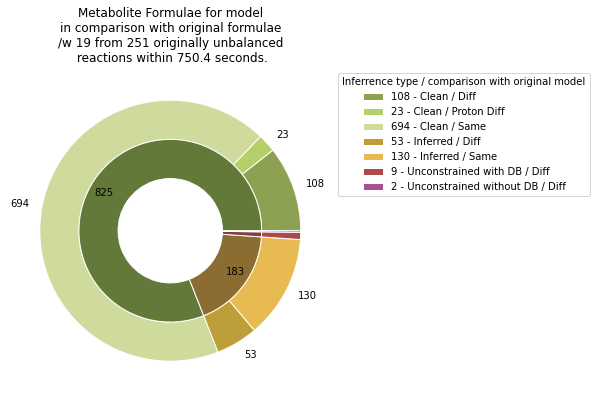

In [7]:
balancer.generate_visual_report().show()

### Metabolite Report
The algorithm should be able to give a reason for every assignment that it chooses. We can have a look at these reasons in the metabolite report of the balancer.

The report holds valuable information how the algorithm decided which assignment to choose and can be useful during further manual curation. The entries of the resulting DataFrame are the following:
* **Id**: Id of the metabolite in the model.
* **Name**: Name of the metabolite in the model.
* **Determined Formula**: Formula that was assigned by the algorithm.
* **Determined Charge**: Charge that was assigned by the algorithm.
* **Previous Formula**: Formula that was assigned before the algorithm.
* **Previous Charge**: Charge that was assigned before the algorithm.
* **Inferrence Type**: Category of how the assignment was determined.
    - Unconstrained: No information about the metabolite was found or only incomplete (wildcard containing) formulae were found and we could not find a concrete formula either. Should contain a wildcard.
    - Inferred: No information about the metabolite was found or only incomplete (wildcard containing formulae were found, however we arrived at a concrete formula. Should not contain a wildcard.
    - Clean: Information about the metabolite was found and used.
* **Reasoning**: Reasoning how the assignment was determined. Can contain:
    - database name:database identifier: The formula could be found in this database under this identifier.
    - (unconstrained) Target: This assignment was chosen because it is the same as in the original (target) model. Unconstrained means that the original (target) model seemed to be missing a wildcard symbol that was thus added.
    - Reaction_id (metabolite id -> Reasoning...): The assignment for this metabolite must follow from other reasons. The given reaction id and metabolite reasons make it so that if the model must be balanced, this metabolite must have the determined assignment.
    - Used Databases: The databases which back up the determined assignment.
    - Previous Databases: The databases which back up the previous assignment.

In [8]:
metabolite_report_df = balancer.generate_metabolite_report()
metabolite_report_df[::200]

,Id,Name,Determined Formula,Determined Charge,Previous Formula,Previous Charge,Inferrence Type,Reasoning,Used Databases,Previous Databases,Similarity
0,M_12dgr140_c,"1,2-Diacyl-sn-glycerol (ditetradecanoyl, n-C14:0)",C31H60O5,0,C31H60O5,0,Inferred,unconstrained Target & Adherence,,,Same
200,M_12dgr180_c,"1,2-Diacyl-sn-glycerol (dioctadecanoyl, n-C18:0)",C39H76O5,0,C39H76O5,0,Clean,unconstrained Target & Adherence & metanetx.ch...,metanetx.chemical:MNXM4217,metanetx.chemical:MNXM4217,Same
400,M_3mb_e,3-Methylbutanoic acid,C5H9O2,-1,C5H9O2,-1,Clean,unconstrained Target & Adherence & seed.compou...,"seed.compound:cpd05178, metanetx.chemical:MNXM...","seed.compound:cpd05178, metanetx.chemical:MNXM...",Same
600,M_hmbil_c,Hydroxymethylbilane,C40H38N4O17,-8,C40H38N4O17,-8,Clean,unconstrained Target & Adherence & metanetx.ch...,"metanetx.chemical:MNXM547, seed.compound:cpd00755","metanetx.chemical:MNXM547, seed.compound:cpd00755",Same
800,M_gln__L_c,L-Glutamine,C5H10N2O3,0,C5H10N2O3,0,Clean,unconstrained Target & Adherence & seed.compou...,"seed.compound:cpd00053, metanetx.chemical:MNXM...","seed.compound:cpd00053, metanetx.chemical:MNXM...",Same
1000,M_pa181_c,"1,2-dioctadec-11-enoyl-sn-glycerol 3-phosphate",C39H72O8P,-1,C39H71O8P,0,Clean,"metanetx.chemical:MNXM90511, seed.compound:cpd...","metanetx.chemical:MNXM90511, seed.compound:cpd...",,Diff


Usually we are interested in the assignments which differ from the original report. We can do this by indexing the Dataframe accordingly.

In [9]:
# If you like to see the entire report, uncomment the following line
#pandas.set_option("display.max_row", None)
metabolite_report_df[metabolite_report_df["Similarity"] != "Same"]

,Id,Name,Determined Formula,Determined Charge,Previous Formula,Previous Charge,Inferrence Type,Reasoning,Used Databases,Previous Databases,Similarity
130,M_R_3hhxa_e,3 hydroxyhexanoic acid,C6H12O3,0,C6H11O3,0,Inferred,,,,Diff
131,M_R_3hhxa_p,3 hydroxyhexanoic acid,C6H12O3,0,C6H11O3,0,Inferred,,,,Diff
132,M_abg4_e,4-aminobenzoate-glutamate,C12H14N2O5,0,C12H11N2O5,0,Inferred,,,,Diff
133,M_glyglu_e,L glycinylglutamate,C7H12N2O5,0,C7H11N2O5,0,Inferred,,,,Diff
134,M_glyglu_p,L glycinylglutamate,C7H12N2O5,0,C7H11N2O5,0,Inferred,,,,Diff
...,...,...,...,...,...,...,...,...,...,...,...
1014,M_aso3_c,Arsenite,AsH2O3,-1,AsH3O3,0,Clean,"metanetx.chemical:MNXM739272, seed.compound:cp...","metanetx.chemical:MNXM739272, seed.compound:cp...",,Proton Diff
1015,M_aso3_e,Arsenite,AsH2O3,-1,AsH3O3,0,Clean,"metanetx.chemical:MNXM739272, seed.compound:cp...","metanetx.chemical:MNXM739272, seed.compound:cp...",,Proton Diff
1016,M_aso3_p,Arsenite,AsH2O3,-1,AsH3O3,0,Clean,"metanetx.chemical:MNXM739272, seed.compound:cp...","metanetx.chemical:MNXM739272, seed.compound:cp...",,Proton Diff
1017,M_h2s_c,Hydrogen sulfide,HS,-1,H2S,0,Clean,"metanetx.chemical:MNXM124865, seed.compound:cp...","metanetx.chemical:MNXM124865, seed.compound:cp...",,Proton Diff


We might also be interested in all assignments which are not backed by a database:

In [10]:
metabolite_report_df[metabolite_report_df["Used Databases"] == ""]

,Id,Name,Determined Formula,Determined Charge,Previous Formula,Previous Charge,Inferrence Type,Reasoning,Used Databases,Previous Databases,Similarity
0,M_12dgr140_c,"1,2-Diacyl-sn-glycerol (ditetradecanoyl, n-C14:0)",C31H60O5,0,C31H60O5,0,Inferred,unconstrained Target & Adherence,,,Same
1,M_12dgr140_p,"1,2-Diacyl-sn-glycerol (ditetradecanoyl, n-C14:0)",C31H60O5,0,C31H60O5,0,Inferred,unconstrained Target & Adherence,,,Same
2,M_1ag160_e,1 Acyl sn glycerol hexadecanoate,C19H38O4,0,C19H38O4,0,Inferred,unconstrained Target & Adherence,,,Same
3,M_1ag180_e,1 Acyl sn glycerol octadecanoate,C21H42O4,0,C21H42O4,0,Inferred,unconstrained Target & Adherence,,,Same
4,M_1ag181d9_e,1 Acyl sn glycerol nC181d9,C21H40O4,0,C21H40O4,0,Inferred,unconstrained Target & Adherence,,,Same
...,...,...,...,...,...,...,...,...,...,...,...
180,M_glyglu_c,L glycinylglutamate,C7H12N2O5,0,C7H11N2O5,0,Inferred,R_AMPTASEGGLU: (M_glu__L_c -> Adherence & meta...,,,Diff
181,M_serglugly_c,Serine-glutamine-glycine tripeptide,C10H19N3O8,0,C10H18N3O8,0,Inferred,R_AMPEP18: (M_glu__L_c -> Adherence & metanetx...,,,Diff
182,M_ficytc_c,Ferricytochrome c C42H52FeN8O6S2,C42FeH42N8O82,-1,C33FeH31N4O4,0,Inferred,R_CYO1_KT: (M_focytc_c -> Adherence & metanetx...,,,Diff
187,M_glutrna_c,L-Glutamyl-tRNA(Glu),C33H41N12O24P3R,0,C33H41N12O24P3,0,Unconstrained,unconstrained Target & R_GLUTRR: (M_glu1sa_c -...,,,Diff


### Reaction Report
Finally, especially for further curation, we might be interested in the remaining imbalanced reactions. For this the algorithm can also provide a report.

The report also includes reactions which are technically balanced but where many protons had to be added to arrive at that result.

The fields are as follows:
* **Id**: Id of the reaction in the model.
* **Unbalanced Reaction**: Name of the reaction in the model and corresponding equation.
* **Unbalanced Type**: Type of imbalance. Can be both Mass and charge, only mass, only charge or high proton count.
* **Reason**: Set of reactions which caused the reaction to be imbalanced. This effectively means that these reactions could not be balanced together. The sets are minimal, but for example for BTS2, it would not help to remove HCYSMT, as BTS2 would require protons to have no charge and HCYSMT is only one of many reactions which then would not be balanced.
* **Shared Metabolites**: Metabolites which are shared between the reactions which are listed in Reason. Can give an indication where the problem might lie.
* **Mass Difference**: Mass imbalance.
* **Charge Difference**: Charge imbalance.

In [11]:
balancer.generate_reaction_report()

,Id,Unbalanced Reaction,Unbalanced Type,Reason,Shared Metabolites,Mass Difference,Charge Difference
0,R_CMCBTFL,"Reaction(id='R_CMCBTFL', name='CMCBTFL', metab...","Mass, Charge",R_CMCBTFL,"M_cmcbtt_c, M_fcmcbtt_c, M_fe3_e, M_h_e",Fe: -1.0,-1.0
1,R_CMCBTFU,"Reaction(id='R_CMCBTFU', name='CMCBTFU', metab...","Mass, Charge",R_CMCBTFU,"M_cmcbtt_c, M_h_c, M_fcmcbtt_c, M_fe3_c",Fe: 1.0,1.0
2,R_CREAT,"Reaction(id='R_CREAT', name='Creatinase', meta...","Mass, Charge",R_CREAT,"M_creat_c, M_h_c, M_sarcs_c, M_h2o_c, M_urea_c",O: 1.0,-2.0
3,R_CYO1_KT,"Reaction(id='R_CYO1_KT', name='Ubiquinol cyt...","Mass, Charge",R_CYO1_KT,"M_q8_c, M_h_c, M_focytc_c, M_q8h2_c, M_ficytc_...","C: -18.0, N: -8.0, O: -156.0",28.0
4,R_CYO1b,"Reaction(id='R_CYO1b', name='CYO1b', metabolit...","Mass, Charge",R_CYO1b,"M_h_c, M_focytc_c, M_o2_c, M_h2o_c, M_ficytc_c","C: 18.0, N: 8.0, O: 156.0",-28.0
5,R_FCLT2,"Reaction(id='R_FCLT2', name='FCLT2', metabolit...","Mass, Charge",R_FCLT2,"M_h_c, M_fmcbtt_c, M_pheme_c, M_mcbtt_c, M_ppp9_c",C: 4.0,-8.0
6,R_FETRANS,"Reaction(id='R_FETRANS', name='FETRANS', metab...","Mass, Charge",R_FETRANS,"M_mcbtt_c, M_h_c, M_fmcbtt_c, M_fe2_c",C: 4.0,-8.0
7,R_MCBTS3,"Reaction(id='R_MCBTS3', name='MCBTS3', metabol...",Mass,R_MCBTS3,"M_pi_c, M_h_c, M_o2_c, M_h2o_c, M_ser__L_c, M_...",O: -1.0,0.0
8,R_MYCTR,"Reaction(id='R_MYCTR', name='MYCTR', metabolit...",Mass,R_MYCTR,"M_h_c, M_msh_c, M_nadph_c, M_nadp_c, M_mssg_c",S: -1.0,0.0
9,R_MYCTR2,"Reaction(id='R_MYCTR2', name='MYCTR2', metabol...",Mass,R_MYCTR2,"M_gthrd_c, M_h_c, M_gthox_c, M_msh_c, M_mssg_c",S: -1.0,0.0


### Writing Files
The mass charge curation writes directly to the model that was given to it. Thus, if we want to write our model, we can just pass the model to cobrapy. If you want to keep your old model, you should make sure to not overwrite it here.

In [12]:
balancer.model_interface.write_model("model_MCC.xml")

For the reports, we can add filenames to the functions to write the visual report to a .png file and the metabolite and reaction DataFrames to .csv files.

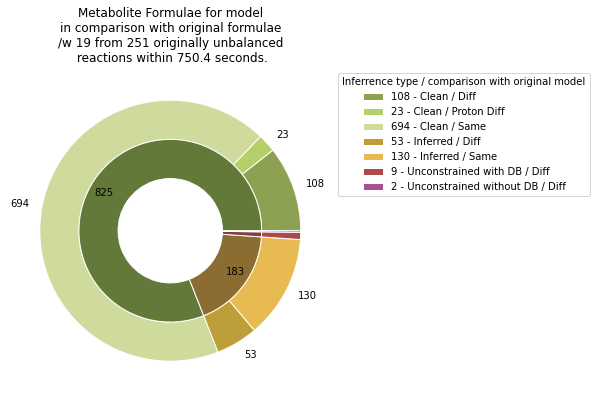

In [13]:
balancer.generate_visual_report(f"{model}_visual")
balancer.generate_metabolite_report(f"{model}_metabolites")
balancer.generate_reaction_report(f"{model}_reactions")
pass

# Fixing Assignments
For some metabolites we might want to fix their assignment, based on some knowledge that is not encoded in the used databases or is not used as it will yield a (theoretically) suboptimal result. We can do this by passing a dictionary mapping the metabolites id to the fixed assignment. 

If, for example (despite it being absolutely ludicrous), we want the metabolite with the id "M_h2o_c" to have the certain formula "CO2" and charge of 5 and the metabolite with the id "M_h_c" have a formula of "C5" and a charge of -7, we can tell this to our algorithm in the following way:

Obviously, this will result in many imbalances.

In [14]:
fixed_assignments = {"M_h2o_c" : ("CO2", 5), "M_h_c" : ("C5", -7)}
balancer = MCC.MassChargeCuration(model = model, data_path = "./data", run_optimization = True, update_ids = False, fixed_assignments = fixed_assignments)

INFO: DataCollection.py 141, gather_info: 1/1019: Getting information for M_10fthf_c
INFO: DataCollection.py 141, gather_info: 2/1019: Getting information for M_12dgr140_c
INFO: DataCollection.py 141, gather_info: 3/1019: Getting information for M_12dgr140_p
INFO: DataCollection.py 141, gather_info: 4/1019: Getting information for M_12dgr141_c
INFO: DataCollection.py 141, gather_info: 5/1019: Getting information for M_12dgr141_p
INFO: DataCollection.py 141, gather_info: 6/1019: Getting information for M_12dgr160_c
INFO: DataCollection.py 141, gather_info: 7/1019: Getting information for M_12dgr160_e
INFO: DataCollection.py 141, gather_info: 8/1019: Getting information for M_12dgr160_p
INFO: DataCollection.py 141, gather_info: 9/1019: Getting information for M_12dgr180_c
INFO: DataCollection.py 141, gather_info: 10/1019: Getting information for M_12dgr180_e
INFO: DataCollection.py 141, gather_info: 11/1019: Getting information for M_12dgr180_p
INFO: DataCollection.py 141, gather_info: 1

INFO: DataCollection.py 141, gather_info: 96/1019: Getting information for M_4adcho_c
INFO: DataCollection.py 141, gather_info: 97/1019: Getting information for M_4ahmmp_c
INFO: DataCollection.py 141, gather_info: 98/1019: Getting information for M_4ahmmp_e
INFO: DataCollection.py 141, gather_info: 99/1019: Getting information for M_4ampm_c
INFO: DataCollection.py 141, gather_info: 100/1019: Getting information for M_4c2me_c
INFO: DataCollection.py 141, gather_info: 101/1019: Getting information for M_4hadnt_c
INFO: DataCollection.py 141, gather_info: 102/1019: Getting information for M_4hba_c
INFO: DataCollection.py 141, gather_info: 103/1019: Getting information for M_4hba_e
INFO: DataCollection.py 141, gather_info: 104/1019: Getting information for M_4hglusa_c
INFO: DataCollection.py 141, gather_info: 105/1019: Getting information for M_4hpro_LT_c
INFO: DataCollection.py 141, gather_info: 106/1019: Getting information for M_4izp_c
INFO: DataCollection.py 141, gather_info: 107/1019: 

INFO: DataCollection.py 141, gather_info: 189/1019: Getting information for M_abg4_e
INFO: DataCollection.py 141, gather_info: 190/1019: Getting information for M_ac_c
INFO: DataCollection.py 141, gather_info: 191/1019: Getting information for M_ac_e
INFO: DataCollection.py 141, gather_info: 192/1019: Getting information for M_ac_p
INFO: DataCollection.py 141, gather_info: 193/1019: Getting information for M_acald_c
INFO: DataCollection.py 141, gather_info: 194/1019: Getting information for M_acald_e
INFO: DataCollection.py 141, gather_info: 195/1019: Getting information for M_acald_p
INFO: DataCollection.py 141, gather_info: 196/1019: Getting information for M_accoa_c
INFO: DataCollection.py 141, gather_info: 197/1019: Getting information for M_acetol_c
INFO: DataCollection.py 141, gather_info: 198/1019: Getting information for M_acg5p_c
INFO: DataCollection.py 141, gather_info: 199/1019: Getting information for M_acg5sa_c
INFO: DataCollection.py 141, gather_info: 200/1019: Getting in

INFO: DataCollection.py 141, gather_info: 284/1019: Getting information for M_aso3_p
INFO: DataCollection.py 141, gather_info: 285/1019: Getting information for M_aso4_c
INFO: DataCollection.py 141, gather_info: 286/1019: Getting information for M_aso4_p
INFO: DataCollection.py 141, gather_info: 287/1019: Getting information for M_asp__L_c
INFO: DataCollection.py 141, gather_info: 288/1019: Getting information for M_asp__L_e
INFO: DataCollection.py 141, gather_info: 289/1019: Getting information for M_asp__L_p
INFO: DataCollection.py 141, gather_info: 290/1019: Getting information for M_aspsa_c
INFO: DataCollection.py 141, gather_info: 291/1019: Getting information for M_atp_c
INFO: DataCollection.py 141, gather_info: 292/1019: Getting information for M_b2coa_c
INFO: DataCollection.py 141, gather_info: 293/1019: Getting information for M_betald_c
INFO: DataCollection.py 141, gather_info: 294/1019: Getting information for M_bhb_c
INFO: DataCollection.py 141, gather_info: 295/1019: Getti

INFO: DataCollection.py 141, gather_info: 380/1019: Getting information for M_ddcacoa_c
INFO: DataCollection.py 141, gather_info: 381/1019: Getting information for M_decdp_c
INFO: DataCollection.py 141, gather_info: 382/1019: Getting information for M_decdp_tb_c
INFO: DataCollection.py 141, gather_info: 383/1019: Getting information for M_dgdp_c
INFO: DataCollection.py 141, gather_info: 384/1019: Getting information for M_dgmp_c
INFO: DataCollection.py 141, gather_info: 385/1019: Getting information for M_dgsn_c
INFO: DataCollection.py 141, gather_info: 386/1019: Getting information for M_dgtp_c
INFO: DataCollection.py 141, gather_info: 387/1019: Getting information for M_dha_c
INFO: DataCollection.py 141, gather_info: 388/1019: Getting information for M_dhap_c
INFO: DataCollection.py 141, gather_info: 389/1019: Getting information for M_dhf_c
INFO: DataCollection.py 141, gather_info: 390/1019: Getting information for M_dhlam_c
INFO: DataCollection.py 141, gather_info: 391/1019: Gettin

INFO: DataCollection.py 141, gather_info: 476/1019: Getting information for M_gdp_c
INFO: DataCollection.py 141, gather_info: 477/1019: Getting information for M_gdpmann_c
INFO: DataCollection.py 141, gather_info: 478/1019: Getting information for M_gdptp_c
INFO: DataCollection.py 141, gather_info: 479/1019: Getting information for M_ggdp_c
INFO: DataCollection.py 141, gather_info: 480/1019: Getting information for M_glc__D_c
INFO: DataCollection.py 141, gather_info: 481/1019: Getting information for M_glc__D_e
INFO: DataCollection.py 141, gather_info: 482/1019: Getting information for M_glc__D_p
INFO: DataCollection.py 141, gather_info: 483/1019: Getting information for M_glcn__D_c
INFO: DataCollection.py 141, gather_info: 484/1019: Getting information for M_glcn__D_e
INFO: DataCollection.py 141, gather_info: 485/1019: Getting information for M_glcn_c
INFO: DataCollection.py 141, gather_info: 486/1019: Getting information for M_glcn_e
INFO: DataCollection.py 141, gather_info: 487/1019

INFO: DataCollection.py 141, gather_info: 571/1019: Getting information for M_gua_e
INFO: DataCollection.py 141, gather_info: 572/1019: Getting information for M_h2co3_c
INFO: DataCollection.py 141, gather_info: 573/1019: Getting information for M_h2mb4p_c
INFO: DataCollection.py 141, gather_info: 574/1019: Getting information for M_h2o2_c
INFO: DataCollection.py 141, gather_info: 575/1019: Getting information for M_h2o2_e
INFO: DataCollection.py 141, gather_info: 576/1019: Getting information for M_h2o2_p
INFO: DataCollection.py 141, gather_info: 577/1019: Getting information for M_h2o_c
INFO: DataCollection.py 141, gather_info: 578/1019: Getting information for M_h2o_e
INFO: DataCollection.py 141, gather_info: 579/1019: Getting information for M_h2o_p
INFO: DataCollection.py 141, gather_info: 580/1019: Getting information for M_h2s_c
INFO: DataCollection.py 141, gather_info: 581/1019: Getting information for M_h2s_e
INFO: DataCollection.py 141, gather_info: 582/1019: Getting informat

INFO: DataCollection.py 141, gather_info: 667/1019: Getting information for M_mal__L_e
INFO: DataCollection.py 141, gather_info: 668/1019: Getting information for M_mal__L_p
INFO: DataCollection.py 141, gather_info: 669/1019: Getting information for M_malcoa_c
INFO: DataCollection.py 141, gather_info: 670/1019: Getting information for M_malt1p_c
INFO: DataCollection.py 141, gather_info: 671/1019: Getting information for M_malt_c
INFO: DataCollection.py 141, gather_info: 672/1019: Getting information for M_malt_e
INFO: DataCollection.py 141, gather_info: 673/1019: Getting information for M_malthp_c
INFO: DataCollection.py 141, gather_info: 674/1019: Getting information for M_malthx_c
INFO: DataCollection.py 141, gather_info: 675/1019: Getting information for M_maltpt_c
INFO: DataCollection.py 141, gather_info: 676/1019: Getting information for M_malttr_c
INFO: DataCollection.py 141, gather_info: 677/1019: Getting information for M_maltttr_c
INFO: DataCollection.py 141, gather_info: 678/

INFO: DataCollection.py 141, gather_info: 763/1019: Getting information for M_ocdcea_p
INFO: DataCollection.py 141, gather_info: 764/1019: Getting information for M_octa_c
INFO: DataCollection.py 141, gather_info: 765/1019: Getting information for M_octa_e
INFO: DataCollection.py 141, gather_info: 766/1019: Getting information for M_octa_p
INFO: DataCollection.py 141, gather_info: 767/1019: Getting information for M_octdp_c
INFO: DataCollection.py 141, gather_info: 768/1019: Getting information for M_odecoa_c
INFO: DataCollection.py 141, gather_info: 769/1019: Getting information for M_orn_c
INFO: DataCollection.py 141, gather_info: 770/1019: Getting information for M_orn_e
INFO: DataCollection.py 141, gather_info: 771/1019: Getting information for M_orn_p
INFO: DataCollection.py 141, gather_info: 772/1019: Getting information for M_orot5p_c
INFO: DataCollection.py 141, gather_info: 773/1019: Getting information for M_orot_c
INFO: DataCollection.py 141, gather_info: 774/1019: Getting i

INFO: DataCollection.py 141, gather_info: 859/1019: Getting information for M_pser__L_c
INFO: DataCollection.py 141, gather_info: 860/1019: Getting information for M_pt2coa_c
INFO: DataCollection.py 141, gather_info: 861/1019: Getting information for M_pta_c
INFO: DataCollection.py 141, gather_info: 862/1019: Getting information for M_pta_e
INFO: DataCollection.py 141, gather_info: 863/1019: Getting information for M_pta_p
INFO: DataCollection.py 141, gather_info: 864/1019: Getting information for M_ptcoa_c
INFO: DataCollection.py 141, gather_info: 865/1019: Getting information for M_ptcys_c
INFO: DataCollection.py 141, gather_info: 866/1019: Getting information for M_ptrc_c
INFO: DataCollection.py 141, gather_info: 867/1019: Getting information for M_ptrc_e
INFO: DataCollection.py 141, gather_info: 868/1019: Getting information for M_ptrc_p
INFO: DataCollection.py 141, gather_info: 869/1019: Getting information for M_ptth_c
INFO: DataCollection.py 141, gather_info: 870/1019: Getting i

INFO: DataCollection.py 141, gather_info: 955/1019: Getting information for M_thym_c
INFO: DataCollection.py 141, gather_info: 956/1019: Getting information for M_thym_e
INFO: DataCollection.py 141, gather_info: 957/1019: Getting information for M_thymd_c
INFO: DataCollection.py 141, gather_info: 958/1019: Getting information for M_tnt_c
INFO: DataCollection.py 141, gather_info: 959/1019: Getting information for M_tnt_e
INFO: DataCollection.py 141, gather_info: 960/1019: Getting information for M_tnt_p
INFO: DataCollection.py 141, gather_info: 961/1019: Getting information for M_tntmdh_c
INFO: DataCollection.py 141, gather_info: 962/1019: Getting information for M_tntmmh_c
INFO: DataCollection.py 141, gather_info: 963/1019: Getting information for M_trdox_c
INFO: DataCollection.py 141, gather_info: 964/1019: Getting information for M_trdrd_c
INFO: DataCollection.py 141, gather_info: 965/1019: Getting information for M_tre6p_c
INFO: DataCollection.py 141, gather_info: 966/1019: Getting 

INFO: MCC.py 39, __init__: [62.918 s] Finished balancibility check. 752 non-pseudo reactions were unbalancable.
INFO: MCC.py 46, __init__: [31.291 s] Finished adherence optimization.
INFO: MCC.py 52, __init__: [26.976 s] Finished formula optimization.


INFO: util.py 80, adjust_proton_count: added 29.0 protons to reaction R_FAS140


INFO: util.py 80, adjust_proton_count: added 33.0 protons to reaction R_RHACOAET40


INFO: util.py 80, adjust_proton_count: added 24.0 protons to reaction R_STAS


INFO: util.py 80, adjust_proton_count: added 13.0 protons to reaction R_TNTR1
INFO: util.py 80, adjust_proton_count: added 13.0 protons to reaction R_TNTR1x
INFO: util.py 80, adjust_proton_count: added 13.0 protons to reaction R_TNTR2
INFO: util.py 80, adjust_proton_count: added 13.0 protons to reaction R_TNTR2x


In [15]:
unbalanced_reactions = [r_id for r_id, r in balancer.model_interface.reactions.items() if (not r.is_balanced())]
print(f"There are {len(unbalanced_reactions)} unbalanced reactions with {len(balancer.model_interface.get_pseudo_reactions())} pseudo reactions.")

There are 962 unbalanced reactions with 196 pseudo reactions.


In [16]:
balancer.model_interface.metabolites["M_h2o_c"]

Metabolite(id='M_h2o_c', name='H2O H2O', formula=CO2, charge=5, SBO=247)

In [17]:
balancer.model_interface.metabolites["M_h_c"]

Metabolite(id='M_h_c', name='H+', formula=C5, charge=-7, SBO=247)

We can see that setting strange values for water and hydrogen will make many reactions unbalancable but that the balancer adheres to the fixed values.

## Using BioCyc flat files
If you have access (currently requires an explicit academic license or a subscription) and downloaded the BioCyc flat files, you can pass the corresponding directory as well. Assuming we have already updated all the ids in the last step, we can set _update_ids_ to _False_.

The additional argument is:
* **biocyc_path**: Directory containing BioCyc flat files.

In [18]:
balancer = MCC.MassChargeCuration(model = model, data_path = "./data", update_ids = True, biocyc_path = "./data/23.5/data")

INFO: DataCollection.py 182, get_all_ids: 1/1019: M_10fthf_c
INFO: DataCollection.py 226, get_ids: Found new ids ['10fthf'] in bigg.metabolite via id & name based search for M_10fthf_c
INFO: DataCollection.py 182, get_all_ids: 2/1019: M_12dgr140_c
INFO: DataCollection.py 226, get_ids: Found new ids ['12dgr140'] in bigg.metabolite via id & name based search for M_12dgr140_c
ERROR: DataCollection.py 231, get_ids: Error searching for identifier in biocyc:
Traceback (most recent call last):
  File "/home/finnem/Systems Biology HiWi/MassChargeCuration/MCC/DataCollection/DataCollection.py", line 224, in get_ids
    if (not (found := self.interfaces[db_identifier].search_identifier(names, DB_ids)) is None) and (len(found) > 0):
  File "/home/finnem/Systems Biology HiWi/MassChargeCuration/MCC/DataCollection/Requests/BioCyc.py", line 86, in search_identifier
    df = pd.read_csv(StringIO(response.text), sep = "\t")
  File "/home/finnem/miniconda3/envs/MCC/lib/python3.8/site-packages/pandas/util

INFO: DataCollection.py 275, get_ids: Found new id MNXM4940 in metanetx.chemical from ('bigg.metabolite', '12dgr141') for M_12dgr141_p
INFO: DataCollection.py 182, get_all_ids: 6/1019: M_12dgr160_c
INFO: DataCollection.py 226, get_ids: Found new ids ['12dgr160'] in bigg.metabolite via id & name based search for M_12dgr160_c
ERROR: DataCollection.py 231, get_ids: Error searching for identifier in biocyc:
Traceback (most recent call last):
  File "/home/finnem/Systems Biology HiWi/MassChargeCuration/MCC/DataCollection/DataCollection.py", line 224, in get_ids
    if (not (found := self.interfaces[db_identifier].search_identifier(names, DB_ids)) is None) and (len(found) > 0):
  File "/home/finnem/Systems Biology HiWi/MassChargeCuration/MCC/DataCollection/Requests/BioCyc.py", line 86, in search_identifier
    df = pd.read_csv(StringIO(response.text), sep = "\t")
  File "/home/finnem/miniconda3/envs/MCC/lib/python3.8/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return 

INFO: DataCollection.py 275, get_ids: Found new id MNXM4217 in metanetx.chemical from ('bigg.metabolite', '12dgr180') for M_12dgr180_c
INFO: DataCollection.py 182, get_all_ids: 10/1019: M_12dgr180_e
INFO: DataCollection.py 226, get_ids: Found new ids ['12dgr180'] in bigg.metabolite via id & name based search for M_12dgr180_e
ERROR: DataCollection.py 231, get_ids: Error searching for identifier in biocyc:
Traceback (most recent call last):
  File "/home/finnem/Systems Biology HiWi/MassChargeCuration/MCC/DataCollection/DataCollection.py", line 224, in get_ids
    if (not (found := self.interfaces[db_identifier].search_identifier(names, DB_ids)) is None) and (len(found) > 0):
  File "/home/finnem/Systems Biology HiWi/MassChargeCuration/MCC/DataCollection/Requests/BioCyc.py", line 86, in search_identifier
    df = pd.read_csv(StringIO(response.text), sep = "\t")
  File "/home/finnem/miniconda3/envs/MCC/lib/python3.8/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return

INFO: DataCollection.py 275, get_ids: Found new id MNXM3775 in metanetx.chemical from ('bigg.metabolite', '12dgr181') for M_12dgr181_p
INFO: DataCollection.py 182, get_all_ids: 14/1019: M_12ppd__S_c
INFO: DataCollection.py 226, get_ids: Found new ids ['12ppd__S'] in bigg.metabolite via id & name based search for M_12ppd__S_c
INFO: DataCollection.py 275, get_ids: Found new id MNXM1255 in metanetx.chemical from ('bigg.metabolite', '12ppd__S') for M_12ppd__S_c
INFO: DataCollection.py 182, get_all_ids: 15/1019: M_12ppd__S_e
INFO: DataCollection.py 226, get_ids: Found new ids ['12ppd__S'] in bigg.metabolite via id & name based search for M_12ppd__S_e
INFO: DataCollection.py 275, get_ids: Found new id MNXM1255 in metanetx.chemical from ('bigg.metabolite', '12ppd__S') for M_12ppd__S_e
INFO: DataCollection.py 182, get_all_ids: 16/1019: M_13dpg_c
INFO: DataCollection.py 226, get_ids: Found new ids ['13dpg'] in bigg.metabolite via id & name based search for M_13dpg_c
INFO: DataCollection.py 182,

KeyboardInterrupt: 